# 1. 初始準備

In [5]:
!pip install numpy==1.16.2

     |████████████████████████████████| 17.3MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 2. 讀入 IMDB 電影數據庫

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
(x_train0, y_train), (x_test0, y_test) = imdb.load_data(num_words = 10000)

#3. 資料整理

輸入資料的文字上限數

In [0]:
from keras.preprocessing import sequence

In [0]:
x_train = sequence.pad_sequences(x_train0, maxlen = 150)
x_test = sequence.pad_sequences(x_test0, maxlen = 150)

#4. 打造RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM

## 4-1 model1(上課的model)

In [18]:
# 參數設定
N = 3 # 文字要壓到 N 維
K = 4 # LSTM 有 K 個神經元

#建構神經網路
model_1 = Sequential()
model_1.add(Embedding(10000, N))
model_1.add(LSTM(K))
model_1.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_1.summary()

#訓練
model_1_out = model_1.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=5,
                          validation_data = (x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.5015 - acc: 0.7562 - val_loss: 0.3740 - val_acc: 0.8379
Epoch 2/5
25000/25000 [==============================] - 63s 3ms/step - loss: 0.3001 - acc: 0.8802 - val_loss: 0.3396 - val_acc: 0.8580
Epoch 3/5
25000/25000 [==============================] - 64s 3ms/step - loss: 0.

似乎有overfitting2的狀態，畫圖來看看。

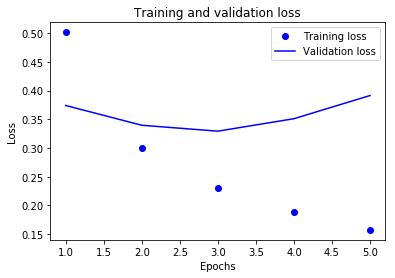

In [21]:
acc = model_1_out.history['acc']
val_acc = model_1_out.history['val_acc']
loss = model_1_out.history['loss']
val_loss = model_1_out.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### model1 小結

大概在第三次epochs時，val_acc開始上升

## 4-2 model2

發現model1大概在訓練第三次左右出現overfitting的狀態。於是，加入兩層dropout。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 3)           30000     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 3)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 75s 3ms/step - loss: 0.5449 - a

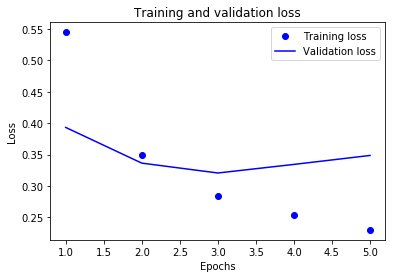

In [24]:
# 參數設定
N = 3 # 文字要壓到 N 維
K = 4 # LSTM 有 K 個神經元

#建構神經網路
model_2 = Sequential()
model_2.add(Embedding(10000, N))
model_2.add(Dropout(0.25))
model_2.add(LSTM(K))
model_2.add(Dropout(0.25))
model_2.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_2.summary()

#訓練
model_2_out = model_2.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=5,
                          validation_data = (x_test, y_test))
#檢查overfitting
acc = model_2_out.history['acc']
val_acc = model_2_out.history['val_acc']
loss = model_2_out.history['loss']
val_loss = model_2_out.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
score2 = model_2.evaluate(x_test, y_test)
print("Model2 Accuracy: %.2f%%" % (score2[1]*100))

## 4-3 model3

由於model2增加dropout似乎有提升一點點準確率，但是overfitting的狀態還是存在，決定讓訓練次數少一些，並調整：N/K。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 10)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 112,251
Trainable params: 112,251
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4417 

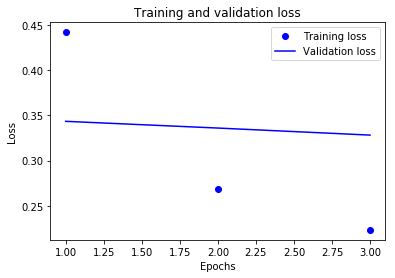

In [26]:
# 參數設定
N = 10 # 文字要壓到 N 維
K = 50 # LSTM 有 K 個神經元

#建構神經網路
model_3 = Sequential()
model_3.add(Embedding(10000, N))
model_3.add(Dropout(0.25))
model_3.add(LSTM(K))
model_3.add(Dropout(0.25))
model_3.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_3.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_3.summary()

#訓練
model_3_out = model_3.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=3,
                          validation_data = (x_test, y_test))
#檢查overfitting
acc = model_3_out.history['acc']
val_acc = model_3_out.history['val_acc']
loss = model_3_out.history['loss']
val_loss = model_3_out.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [38]:
score3 = model_3.evaluate(x_test, y_test)
print("Model 3 Accuracy: %.2f%%" % (score3[1]*100))

25000/25000 [==============================] - 12s 499us/step
Model 3 Accuracy: 86.02%


## 4-4 model4

調整N/K後，準確率又提升了（86.02%），離87%不遠拉～！也許N/K再提高能夠在提升準確率！？

＊＊此外，前面都是手動決定訓練次數，但model3&2發現也很難控制在哪裡val_acc能穩定上升，於是model4開始改成earlystopping來監測val_acc

In [28]:
from keras.callbacks import EarlyStopping
# 參數設定
N = 100 # 文字要壓到 N 維
K = 100 # LSTM 有 K 個神經元

#建構神經網路
model_4 = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=2,
                               mode='max',
                               patience=1)
model_4.add(Embedding(10000, N))
model_4.add(Dropout(0.25))
model_4.add(LSTM(K))
model_4.add(Dropout(0.25))
model_4.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_4.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_4.summary()

#訓練
model_4_out = model_4.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=10,
                          validation_data = (x_test, y_test),
                          callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 100)         1000000   
_________________________________________________________________
dropout_15 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 173s 7ms/step - loss: 0.

In [35]:
score4 = model_4.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (score4[1]*100))

25000/25000 [==============================] - 27s 1ms/step
Accuracy: 85.34%


## 4-5model5

由於過大的N/K並沒有提升準確率，反而下降，所以把它先調回來，並且更改dropout的比率，看能不能提升

In [40]:
# 參數設定
N = 10 # 文字要壓到 N 維
K = 50 # LSTM 有 K 個神經元

#建構神經網路
model_5 = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=2,
                               mode='max',
                               patience=1)
model_5.add(Embedding(10000, N))
model_5.add(Dropout(0.5))
model_5.add(LSTM(K))
model_5.add(Dropout(0.25))
model_5.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_5.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_5.summary()

#訓練
model_5_out = model_5.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=10,
                          validation_data = (x_test, y_test),
                          callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 10)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 112,251
Trainable params: 112,251
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4980

In [41]:
score5 = model_5.evaluate(x_test, y_test)
print("Model 5 Accuracy: %.2f%%" % (score5[1]*100))

25000/25000 [==============================] - 13s 520us/step
Model 5 Accuracy: 86.27%


## 4-6 model6

調低第二次dropout

In [43]:
# 參數設定
N = 10 # 文字要壓到 N 維
K = 50 # LSTM 有 K 個神經元

#建構神經網路
model_6 = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=2,
                               mode='max',
                               patience=1)
model_6.add(Embedding(10000, N))
model_6.add(Dropout(0.5))
model_6.add(LSTM(K))
model_6.add(Dropout(0.1))
model_6.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_6.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_6.summary()

#訓練
model_6_out = model_6.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=10,
                          validation_data = (x_test, y_test),
                          callbacks=[early_stopping])

score6 = model_6.evaluate(x_test, y_test)
print("Model 6 Accuracy: %.2f%%" % (score6[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
dropout_23 (Dropout)         (None, None, 10)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 112,251
Trainable params: 112,251
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.4601 

## 4-7 model7 把第二次dropout刪除

In [44]:
# 參數設定
N = 10 # 文字要壓到 N 維
K = 50 # LSTM 有 K 個神經元

#建構神經網路
model_7 = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=2,
                               mode='max',
                               patience=1)
model_7.add(Embedding(10000, N))
model_7.add(Dropout(0.5))
model_7.add(LSTM(K))
# model_7.add(Dropout(0.1))
model_7.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_7.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_7.summary()

#訓練
model_7_out = model_7.fit(x_train, y_train,
                          batch_size = 32,
                          epochs=10,
                          validation_data = (x_test, y_test),
                          callbacks=[early_stopping])

score7 = model_7.evaluate(x_test, y_test)
print("Model 7 Accuracy: %.2f%%" % (score7[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
dropout_25 (Dropout)         (None, None, 10)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 112,251
Trainable params: 112,251
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 92s 4ms/step - loss: 0.4419 - acc: 0.7858 - val_loss: 0.3555 - val_acc: 0.8521
Epoch 2/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.

## 4-8 model8 調高maxlen的數值

In [55]:
# 參數設定
x_train8 = sequence.pad_sequences(x_train0, maxlen = 200)
x_test8 = sequence.pad_sequences(x_test0, maxlen = 200)
N = 10 # 文字要壓到 N 維
K = 50 # LSTM 有 K 個神經元

#建構神經網路
model_8 = Sequential()
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=2,
                               mode='max',
                               patience=1)
model_8.add(Embedding(10000, N))
model_8.add(Dropout(0.5))
model_8.add(LSTM(K))
model_8.add(Dropout(0.1))
model_8.add(Dense(1, activation='sigmoid'))

#組裝神經網路
model_8.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

#查看神經網路
model_8.summary()

#訓練
model_8_out = model_8.fit(x_train8, y_train,
                          batch_size = 32,
                          epochs=10,
                          validation_data = (x_test8, y_test),
                          callbacks=[early_stopping])

score8 = model_8.evaluate(x_test, y_test)
print("Model 8 Accuracy: %.2f%%" % (score8[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
dropout_44 (Dropout)         (None, None, 10)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dropout_45 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 51        
Total params: 112,251
Trainable params: 112,251
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 132s 5ms/step - loss: 0.5193

# 5.結論

無論如何都無法達到87%QQQQQQQQQQ

但還是歸納幾個結論

* 調高N/K值有用，但是調太高反而有反效果
* 調高第一次dropout能夠提高準確率，第二次dropout要降低才行，但不能刪除
* 增加dropout能夠降低fitover的狀況
* model6的狀況最佳！